In [238]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
import requests
from bs4 import BeautifulSoup
from collections import Counter
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']


In [239]:
df = pd.read_csv('Odi_bat.csv')

In [240]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13,Player
0,101*,195,121,10,0,83.47,3,not out,1,NaN,v South Africa,Eden Gardens,5 Nov 2023,ODI # 4694,Virat
1,88,139,94,11,0,93.61,3,caught,1,NaN,v Sri Lanka,Wankhede,2 Nov 2023,ODI # 4690,Virat
2,0,12,9,0,0,0.00,3,caught,1,NaN,v England,Lucknow,29 Oct 2023,ODI # 4686,Virat
3,95,154,104,8,2,91.34,3,caught,2,NaN,v New Zealand,Dharamsala,22 Oct 2023,ODI # 4678,Virat
4,103*,113,97,6,4,106.18,3,not out,2,NaN,v Bangladesh,Pune,19 Oct 2023,ODI # 4674,Virat


In [241]:
df.pop(df.columns[13])

0       ODI # 4694
1       ODI # 4690
2       ODI # 4686
3       ODI # 4678
4       ODI # 4674
           ...    
2562    ODI # 4512
2563    ODI # 4513
2564    ODI # 4558
2565    ODI # 4563
2566    ODI # 4638
Name: Unnamed: 13, Length: 2567, dtype: object

In [242]:
df.pop(df.columns[9])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2562   NaN
2563   NaN
2564   NaN
2565   NaN
2566   NaN
Name: Unnamed: 9, Length: 2567, dtype: float64

In [243]:
df.pop(df.columns[7])

0       not out
1        caught
2        caught
3        caught
4       not out
         ...   
2562          -
2563          -
2564          -
2565     bowled
2566     bowled
Name: Dismissal, Length: 2567, dtype: object

In [244]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Opposition,Ground,Start Date,Player
0,101*,195,121,10,0,83.47,3,1,v South Africa,Eden Gardens,5 Nov 2023,Virat
1,88,139,94,11,0,93.61,3,1,v Sri Lanka,Wankhede,2 Nov 2023,Virat
2,0,12,9,0,0,0.00,3,1,v England,Lucknow,29 Oct 2023,Virat
3,95,154,104,8,2,91.34,3,2,v New Zealand,Dharamsala,22 Oct 2023,Virat
4,103*,113,97,6,4,106.18,3,2,v Bangladesh,Pune,19 Oct 2023,Virat


In [245]:
df.shape

(2567, 12)

In [246]:
df = df[df['Runs'] != 'DNB']
df = df[df['Runs'] != 'TDNB']

In [247]:
df.shape

(1893, 12)

In [251]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala', 'Pune', 'Ahmedabad', 'Delhi', 'Chennai',
                   'Rajkot', 'Visakhapatnam', 'Indore', 'Hyderabad', 'Thiruvananthapuram', 'Raipur', 'Guwahati',
                   'Bengaluru', 'Cuttack', 'Nagpur', 'Ranchi', 'Mohali']

SA_stadiums = ['Wellington', 'Centurion', 'Johannesburg', 'Cape Town', 'Durban', 'Bloemfontein', 'Paarl',
               'East London', 'Potchefstroom', 'Gqeberha', 'Kimberley']

indian_ply = ['Virat', 'Rohit', 'Ishan', 'Shreyas', 'Rahul', 'Shubman', 'Hardik', 'Jasprit', 'Kuldeep', 'Shami',
              'Axar', 'Shardul', 'Siraj', 'Suryakumar', 'Ashwin', 'Jadeja', 'Krishna']

SA_ply = ['Temba', 'David', 'Rassie', 'Reeza', 'Marco', 'Aiden', 'Quinton', 'Heinrich', 'Andile', 'Gerald', 'Keshav',
          'Lungi', 'Kagiso', 'Tabraiz', 'Lizaad', 'Sisanda', 'Anrich']

for index, row in df.iterrows():
    player = row['Player']
    ground = row['Ground']

    if player in indian_ply and ground in indian_stadiums:
        df.at[index, 'Ground'] = 1
    elif player in SA_ply and ground in SA_stadiums:
        df.at[index, 'Ground'] = 1
    else:
        df.at[index, 'Ground'] = 0


In [253]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%d %b %Y')
df['Opposition'] = df['Opposition'].str[2:]

In [254]:
df['Mins'] = pd.to_numeric(df['Mins'], errors='coerce')
df['BF'] = pd.to_numeric(df['BF'], errors='coerce')
df['4s'] = pd.to_numeric(df['4s'], errors='coerce')
df['6s'] = pd.to_numeric(df['6s'], errors='coerce')
df['SR'] = pd.to_numeric(df['SR'], errors='coerce')
df['Ground'] = pd.to_numeric(df['Ground'], errors='coerce')
df['Pos'] = pd.to_numeric(df['Pos'], errors='coerce')
df['Inns'] = pd.to_numeric(df['Inns'], errors='coerce')
df['NO'] = df['Runs'].str.endswith('*').astype(int)
df['Runs'] = df['Runs'].str.replace('*', '')
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

<ipython-input-254-d5edb6518c55>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Runs'] = df['Runs'].str.replace('*', '')


In [255]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Opposition,Ground,Start Date,Player,NO
0,101,195.0,121,10,0,83.47,3,1,South Africa,1,2023-11-05,Virat,1
1,88,139.0,94,11,0,93.61,3,1,Sri Lanka,1,2023-11-02,Virat,0
2,0,12.0,9,0,0,0.00,3,1,England,1,2023-10-29,Virat,0
3,95,154.0,104,8,2,91.34,3,2,New Zealand,1,2023-10-22,Virat,0
4,103,113.0,97,6,4,106.18,3,2,Bangladesh,1,2023-10-19,Virat,1


In [256]:
df.describe()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Ground,NO
count,1893.000000,1674.000000,1893.000000,1893.000000,1893.000000,1867.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,32.077655,49.483871,34.075541,2.949287,0.705758,84.262051,4.820919,1.484416,0.409931,0.221342
std,36.466988,47.953280,33.633960,3.754147,1.431137,51.671832,2.808577,0.499889,0.491951,0.415260
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,13.000000,8.000000,0.000000,0.000000,55.550000,3.000000,1.000000,0.000000,0.000000
50%,19.000000,33.000000,22.000000,2.000000,0.000000,83.330000,4.000000,1.000000,0.000000,0.000000
75%,47.000000,73.000000,50.000000,4.000000,1.000000,106.260000,7.000000,2.000000,1.000000,0.000000
max,264.000000,228.000000,173.000000,33.000000,16.000000,600.000000,11.000000,2.000000,1.000000,1.000000


In [257]:
import numpy as np
conditions = [
    (df['Runs'] >= 100),
    (df['Runs'] >= 50)
]
values = [2, 1]
df['milestone'] = np.select(conditions, values, default=0)

In [391]:
df.isnull().sum()

Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Inns          0
Opposition    0
Ground        0
Start Date    0
Player        0
NO            0
milestone     0
dtype: int64

In [389]:
df['Mins'].fillna(df['Mins'].mean(), inplace=True)
df['SR'].fillna(df['SR'].mean(), inplace=True)

In [390]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Opposition,Ground,Start Date,Player,NO,milestone
0,101,195.0,121,10,0,83.47,3,1,South Africa,1,2023-11-05,Virat,1,2
1,88,139.0,94,11,0,93.61,3,1,Sri Lanka,1,2023-11-02,Virat,0,1
2,0,12.0,9,0,0,0.00,3,1,England,1,2023-10-29,Virat,0,0
3,95,154.0,104,8,2,91.34,3,2,New Zealand,1,2023-10-22,Virat,0,1
4,103,113.0,97,6,4,106.18,3,2,Bangladesh,1,2023-10-19,Virat,1,2


Algorithm for batsman :
0.30*run_scored+0.05*notout_innigs+
0.20*bat_avg + 0.15*bat_sr+0.15*milestone_reaching_ability+ 0.10*no_of_4’s_6’s+0.05*high_score-0.05*no_of_zeroes
β_pos_score =max (α_batsmen_score_at_each_position)
4: γ_inningwise_score = 0.40*α_batsmen_score_first_inning+
0.60*α_batsmen_score_seocnd_inning
5: x_venue = 0.35*α_batsmen_score_home_matches+0.65*
α_batsmen_score_away_matches
6: y_opponent = 0.70*α_batsmen_score_strong_opponent+0.30*
α_batsmen_score_weak_opponent
7: w_yearwise = 0.20*α_batsmen_score_current_year+0.80*
α_batsmen_score_last_five_year
8:batting_score = 0.25*α_batsmen_score+0.10*β_pos_score+0.15*γ_inningwise_score+0.15*x_venue +0.15*
y_opponent+0.20*w_yearwise


In [392]:
def coun(data):
  if data.shape[0] == 0:
    return 0
  else :
    n= 1/data.shape[0]
  ans = (data['Runs'].sum()*0.3) + (0.05*data[data['NO'] == 1].shape[0]) +(0.20*data['Runs'].mean())\
  +(data['SR'].mean()*0.15) + (15*(data[data['milestone'] == 1].shape[0]+data[data['milestone'] == 2].shape[0])*n) +\
  (0.10 * (data['4s'].sum()+data['6s'].sum())) + (0.05 * data['Runs'].max()) - (0.05 * data[data['Runs'] == 0].shape[0])
  return ans

In [395]:
from datetime import datetime
def count(data,date):
  year =  datetime.strptime(date, "%d %b %Y").year
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  alpha_batsmen_score = coun(data)
  unp = data['Pos'].unique()
  beta_batsmen_score = 0
  for i in range(len(unp)):
    ans = coun(data[data['Pos'] == unp[i]])
    beta_batsmen_score = max (beta_batsmen_score,ans)
  gemma_batsmen_score = (0.40*coun(data[data['Inns'] == 1])) + (0.60*coun(data[data['Inns'] == 2]))
  x_venue = (0.35*coun(data[data['Ground'] == 1])) + (0.65*coun(data[data['Ground'] == 0]))
  y_opponent = (0.70*coun(data[data['Opposition'] == 'England'])) + (0.30*coun(data[data['Opposition'] == 'Pakistan']))
  w_yearwise =(0.80*coun(data[(data['Start Date'].dt.year >= (year-5)) & (data['Start Date'].dt.year <= year)])) \
  + (0.20*coun(data[data['Start Date'] == year]))
  batting_score = (0.25*alpha_batsmen_score) + (0.10*beta_batsmen_score) +\
  (0.15*gemma_batsmen_score) + (0.15*x_venue) + (0.15*y_opponent) + (0.20*w_yearwise)
  return batting_score

In [396]:
ans = df[df['Player']=='Tabraiz']
count(ans,"28 Feb 2020")

3.943224173138726

In [263]:
df2 = pd.read_csv('Odi_bow.csv')

In [264]:
df2.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date,Unnamed: 11,Player
0,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat
1,DNB,-,-,-,-,-,1,NaN,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat
2,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat
3,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat
4,DNB,-,-,-,-,-,1,NaN,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat


In [265]:
df2.pop(df2.columns[11])

0       ODI # 2742
1       ODI # 2745
2       ODI # 2750
3       ODI # 2755
4       ODI # 2756
           ...    
2562    ODI # 4512
2563    ODI # 4513
2564    ODI # 4558
2565    ODI # 4563
2566    ODI # 4638
Name: Unnamed: 11, Length: 2567, dtype: object

In [266]:
df2.pop(df2.columns[7])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2562   NaN
2563   NaN
2564   NaN
2565   NaN
2566   NaN
Name: Unnamed: 7, Length: 2567, dtype: float64

In [267]:
df2 = df2[df2['Overs'] != 'DNB']
df2 = df2[df2['Overs'] != 'TDNB']

In [268]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala', 'Pune', 'Ahmedabad', 'Delhi', 'Chennai',
                   'Rajkot', 'Visakhapatnam', 'Indore', 'Hyderabad', 'Thiruvananthapuram', 'Raipur', 'Guwahati',
                   'Bengaluru', 'Cuttack', 'Nagpur', 'Ranchi', 'Mohali']

SA_stadiums = ['Wellington', 'Centurion', 'Johannesburg', 'Cape Town', 'Durban', 'Bloemfontein', 'Paarl',
               'East London', 'Potchefstroom', 'Gqeberha', 'Kimberley']

indian_ply = ['Virat', 'Rohit', 'Ishan', 'Shreyas', 'Rahul', 'Shubman', 'Hardik', 'Jasprit', 'Kuldeep', 'Shami',
              'Axar', 'Shardul', 'Siraj', 'Suryakumar', 'Ashwin', 'Jadeja', 'Krishna']

SA_ply = ['Temba', 'David', 'Rassie', 'Reeza', 'Marco', 'Aiden', 'Quinton', 'Heinrich', 'Andile', 'Gerald', 'Keshav',
          'Lungi', 'Kagiso', 'Tabraiz', 'Lizaad', 'Sisanda', 'Anrich']

for index, row in df2.iterrows():
    player = row['Player']
    ground = row['Ground']

    if player in indian_ply and ground in indian_stadiums:
        df2.at[index, 'Ground'] = 1
    elif player in SA_ply and ground in SA_stadiums:
        df2.at[index, 'Ground'] = 1
    else:
        df2.at[index, 'Ground'] = 0


In [269]:
df2['Overs'] = pd.to_numeric(df2['Overs'], errors='coerce')
df2['Mdns'] = pd.to_numeric(df2['Mdns'], errors='coerce')
df2['Ground'] = pd.to_numeric(df2['Ground'], errors='coerce')
df2['Runs'] = pd.to_numeric(df2['Runs'], errors='coerce')
df2['Wkts'] = pd.to_numeric(df2['Wkts'], errors='coerce')
df2['Econ'] = pd.to_numeric(df2['Econ'], errors='coerce')
df2['Pos'] = pd.to_numeric(df2['Pos'], errors='coerce')
df2['Inns'] = pd.to_numeric(df2['Inns'], errors='coerce')
df2['Start Date'] = pd.to_datetime(df2['Start Date'], format='%d %b %Y')

In [270]:
df2.describe()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,7.713612,0.342205,40.447909,1.359696,5.390221,3.671483,1.436502,0.432700
std,2.640613,0.623004,17.349202,1.235837,1.902340,1.665772,0.496140,0.495638
min,0.100000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,6.000000,0.000000,29.000000,0.000000,4.100000,2.000000,1.000000,0.000000
50%,9.000000,0.000000,40.000000,1.000000,5.200000,4.000000,1.000000,0.000000
75%,10.000000,1.000000,52.000000,2.000000,6.375000,5.000000,2.000000,1.000000
max,10.000000,4.000000,94.000000,6.000000,18.000000,9.000000,2.000000,1.000000


In [271]:
df2.isnull().sum()

Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Pos           0
Inns          0
Opposition    0
Ground        0
Start Date    0
Player        0
dtype: int64

In [272]:
df2['Opposition'] = df2['Opposition'].str[2:]

In [273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 6 to 2566
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Overs       1315 non-null   float64       
 1   Mdns        1315 non-null   int64         
 2   Runs        1315 non-null   int64         
 3   Wkts        1315 non-null   int64         
 4   Econ        1315 non-null   float64       
 5   Pos         1315 non-null   int64         
 6   Inns        1315 non-null   int64         
 7   Opposition  1315 non-null   object        
 8   Ground      1315 non-null   int64         
 9   Start Date  1315 non-null   datetime64[ns]
 10  Player      1315 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 155.6+ KB


In [274]:
def bowscore(data):
  if data.shape[0] == 0 :
    return 0;
  cw = 1
  if data['Wkts'].sum() != 0 :
    cw = 1/data['Wkts'].sum()
  else :
    cw = 0
  ans = (data['Wkts'].sum()*0.3) + (0.20*data['Runs'].sum()*cw) + \
  (0.10*((((data['Overs'] * 10) % 10).astype(int))+ (data['Overs'].astype(int) * 6)).sum()) + \
  (0.15*data['Runs'].sum()/data['Overs'].sum()) + (0.10*(data[data['Wkts']==4].shape[0]+data[data['Wkts']==5].shape[0])) +\
  (0.05*data['Wkts'].max() + (0.10*data['Mdns'].sum()) )
  return ans

In [275]:
def count2(data,date):
  year =  datetime.strptime(date, "%d %b %Y").year
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  if data.shape[0] == 0:
    return 0
  alpha_bow_score = bowscore(data)
  beta_bow_score = (0.40*bowscore(data[data['Inns'] == 1])) + (0.60*bowscore(data[data['Inns'] == 2]))
  x_venue = (0.40*bowscore(data[data['Ground'] == 1])) + (0.60*bowscore(data[data['Ground'] == 0]))
  y_opponent = (0.80*bowscore(data[data['Opposition'] == 'England'])) + (0.20*bowscore(data[data['Opposition'] == 'Pakistan']))
  w_yearwise =(0.80*bowscore(data[(data['Start Date'].dt.year >= (year-5)) & (data['Start Date'].dt.year <= year)]))
  + (0.20*bowscore(data[data['Start Date'] == year]))
  bow_score = (0.30*alpha_bow_score) + (0.20*beta_bow_score) +\
  + (0.15*0) + (0.20*0) + (0.15*0)
  return bow_score

In [279]:
count2(df2[df2['Player']=='Kagiso'],"20 Nov 2023")

229.353712560239

In [280]:
def batall(name,date):
  batal = (count2(df2[df2['Player']==name],date)*0.30) + (0.50*count(df[df['Player']==name],date)) + (0.20*(count(df[df['Player']==name],date)\
                                                                                                            -count2(df2[df2['Player']==name],date)))
  return batal

In [281]:
def bowall(name,date):
  bowal = (count2(df2[df2['Player']==name],date)*0.45) + (0.35*count(df[df['Player']==name],date)) + (0.20*(count(df[df['Player']==name],date)-\
                                                                                                            count2(df2[df2['Player']==name],date)))
  return bowal

In [299]:
df3 = pd.read_csv('Odi_f.csv')

In [300]:
df3.head()

,Dis,Ct,St,Ct Wk,Ct Fi,Inns,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10,Player
0,0,0,0,0,0,2,NaN,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat
1,3,3,0,0,3,1,NaN,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat
2,0,0,0,0,0,2,NaN,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat
3,0,0,0,0,0,2,NaN,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat
4,0,0,0,0,0,1,NaN,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat


In [301]:
df3.pop(df3.columns[10])

0       ODI # 2742
1       ODI # 2745
2       ODI # 2750
3       ODI # 2755
4       ODI # 2756
           ...    
2562    ODI # 4512
2563    ODI # 4513
2564    ODI # 4558
2565    ODI # 4563
2566    ODI # 4638
Name: Unnamed: 10, Length: 2567, dtype: object

In [302]:
df3.pop(df3.columns[6])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2562   NaN
2563   NaN
2564   NaN
2565   NaN
2566   NaN
Name: Unnamed: 6, Length: 2567, dtype: float64

In [303]:
df3.pop(df3.columns[1])

0       0
1       3
2       0
3       0
4       0
       ..
2562    0
2563    0
2564    0
2565    0
2566    0
Name: Ct, Length: 2567, dtype: object

In [304]:
df3.pop(df3.columns[0])

0       0
1       3
2       0
3       0
4       0
       ..
2562    0
2563    0
2564    0
2565    0
2566    0
Name: Dis, Length: 2567, dtype: object

In [305]:
df3.describe()

,St,Ct Wk,Ct Fi,Inns,Opposition,Ground,Start Date,Player
count,2567,2567,2567,2567,2567,2567,2567,2567
unique,4,8,6,3,16,83,524,34
top,0,0,0,1,v Australia,Colombo (RPS),12 Sep 2023,Virat
freq,2488,2360,1813,1358,454,119,23,289


In [306]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala', 'Pune', 'Ahmedabad', 'Delhi', 'Chennai',
                   'Rajkot', 'Visakhapatnam', 'Indore', 'Hyderabad', 'Thiruvananthapuram', 'Raipur', 'Guwahati',
                   'Bengaluru', 'Cuttack', 'Nagpur', 'Ranchi', 'Mohali']

SA_stadiums = ['Wellington', 'Centurion', 'Johannesburg', 'Cape Town', 'Durban', 'Bloemfontein', 'Paarl',
               'East London', 'Potchefstroom', 'Gqeberha', 'Kimberley']

indian_ply = ['Virat', 'Rohit', 'Ishan', 'Shreyas', 'Rahul', 'Shubman', 'Hardik', 'Jasprit', 'Kuldeep', 'Shami',
              'Axar', 'Shardul', 'Siraj', 'Suryakumar', 'Ashwin', 'Jadeja', 'Krishna']

SA_ply = ['Temba', 'David', 'Rassie', 'Reeza', 'Marco', 'Aiden', 'Quinton', 'Heinrich', 'Andile', 'Gerald', 'Keshav',
          'Lungi', 'Kagiso', 'Tabraiz', 'Lizaad', 'Sisanda', 'Anrich']

for index, row in df3.iterrows():
    player = row['Player']
    ground = row['Ground']

    if player in indian_ply and ground in indian_stadiums:
        df3.at[index, 'Ground'] = 1
    elif player in SA_ply and ground in SA_stadiums:
        df3.at[index, 'Ground'] = 1
    else:
        df3.at[index, 'Ground'] = 0


In [307]:
df3.head()

,St,Ct Wk,Ct Fi,Inns,Opposition,Ground,Start Date,Player
0,0,0,0,2,v Sri Lanka,0,18 Aug 2008,Virat
1,0,0,3,1,v Sri Lanka,0,20 Aug 2008,Virat
2,0,0,0,2,v Sri Lanka,0,24 Aug 2008,Virat
3,0,0,0,2,v Sri Lanka,0,27 Aug 2008,Virat
4,0,0,0,1,v Sri Lanka,0,29 Aug 2008,Virat


In [308]:
df3['Start Date'] = pd.to_datetime(df3['Start Date'], format='%d %b %Y')

In [309]:
df3['St'] = pd.to_numeric(df3['St'], errors='coerce')
df3['Ct Wk'] = pd.to_numeric(df3['Ct Wk'], errors='coerce')
df3['Ct Fi'] = pd.to_numeric(df3['Ct Fi'], errors='coerce')

In [310]:
df3.isnull().sum()

St            52
Ct Wk         52
Ct Fi         52
Inns           0
Opposition     0
Ground         0
Start Date     0
Player         0
dtype: int64

In [311]:
df3.dropna(subset=['St'], inplace=True)

In [312]:
def wek(data,name,date):
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  if data.shape[0] == 0:
    return 0
  beta_wicket_keeping_ability = 0.70*data['Ct Wk'].sum() + 0.30*data['St'].sum()
  wicket_keeper_score = 0.45 * count(df[df['Player']==name],date) + 0.55*beta_wicket_keeping_ability
  return wicket_keeper_score

In [313]:
print(wek(df3[df3['Player']=='Quinton'],'Quinton',"20 Nov 2023"))

610.1154513107957


In [397]:
df4 =  pd.read_csv('Matches.csv')

In [398]:
df4.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Selection Status,Roll,Match Date,Team
0,Virat,NaN,NaN,NaN,NaN,NaN,Australia,1,Batsman,12 Jan 2016,0
1,Rohit,NaN,NaN,NaN,NaN,NaN,Australia,1,Batsman,12 Jan 2016,0
2,Ishan,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016,0
3,Sheryas,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016,0
4,Rahul,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016,0


In [399]:
for index, row in df4.iterrows():
    name = df4.at[index,'Name']
    date = df4.at[index,'Match Date']
    df4.at[index,'bat_score'] = round(count(df[df['Player']==name],date),2)
    df4.at[index,'bow_score'] = round(count2(df2[df2['Player']==name],date),2)
    df4.at[index,'all_bat'] = round(batall(name,date),2)
    df4.at[index,'all_bow'] = round(bowall(name,date),2)
    df4.at[index,'wkt'] = round(wek(df3[df3['Player']==name],name,date),2)

In [400]:
df4.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Selection Status,Roll,Match Date,Team
0,Virat,1363.84,41.73,958.86,760.54,613.73,Australia,1,Batsman,12 Jan 2016,0
1,Rohit,895.60,31.59,630.08,500.48,403.02,Australia,1,Batsman,12 Jan 2016,0
2,Ishan,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016,0
3,Sheryas,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016,0
4,Rahul,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016,0


In [401]:
df4['Name'].unique()

array(['Virat', 'Rohit', 'Ishan', 'Sheryas', 'Rahul', 'Shubman', 'Hardik',
       'Jasprit', 'Kuldeep', 'Shami', 'Axar', 'Shardul', 'Siraj',
       'Suryakumar', 'Ashwin', 'Jadeja', 'Krishna', 'Temba', 'Quinton',
       'Rezza', 'Heinrich', 'Aiden', 'David', 'Rassie', 'Marco', 'Andile',
       'Gerald', 'Keshav', 'Lungi', 'Kagiso', 'Tabraiz', 'Lizzad',
       'Sisanda', 'Anrich'], dtype=object)

In [402]:
ordinal_mapping = {'Virat': 0, 'Rohit': 1, 'Ishan': 2,'Sheryas':3,'Rahul':4,'Shubman':5,'Hardik':6,'Jasprit':7,'Kuldeep':8,'Shami':9, \
                   'Axar':10,'Shardul':11,'Siraj':12,'Suryakumar':13,'Ashwin':14,'Jadeja':15,'Krishna':16,'Temba':17,'Quinton':18,\
                    'Rezza':19, 'Heinrich':20, 'Aiden':21, 'David':22, 'Rassie':23, 'Marco':24, 'Andile':25,'Gerald':26, 'Keshav':27\
                   , 'Lungi':28, 'Kagiso':29, 'Tabraiz':30, 'Lizzad':31,'Sisanda':32, 'Anrich':33}
df4['Name'] = df4['Name'].map(ordinal_mapping)

In [403]:
ordinal_mapping = {'Australia': 0, 'South Africa': 1, 'Sri Lanka': 2,'England':3,'New Zealand':4,'Bangladesh':5,'Pakistan':6,'Afghanistan':7\
                   ,'India':8,'Netherlands':9}
df4['Opposition'] = df4['Opposition'].map(ordinal_mapping)

In [404]:
ordinal_mapping = {'Batsman': 0, 'Allrounder': 1, 'Bowler': 2,'Bowling Allrounder':3}
df4['Roll'] = df4['Roll'].map(ordinal_mapping)

In [405]:
df4 = df4.drop(['Match Date'],axis=1)

In [406]:
df4.isnull().sum()

Name                0
bat_score           0
bow_score           0
all_bat             0
all_bow             0
wkt                 0
Opposition          0
Selection Status    0
Roll                0
Team                0
dtype: int64

<Axes: >

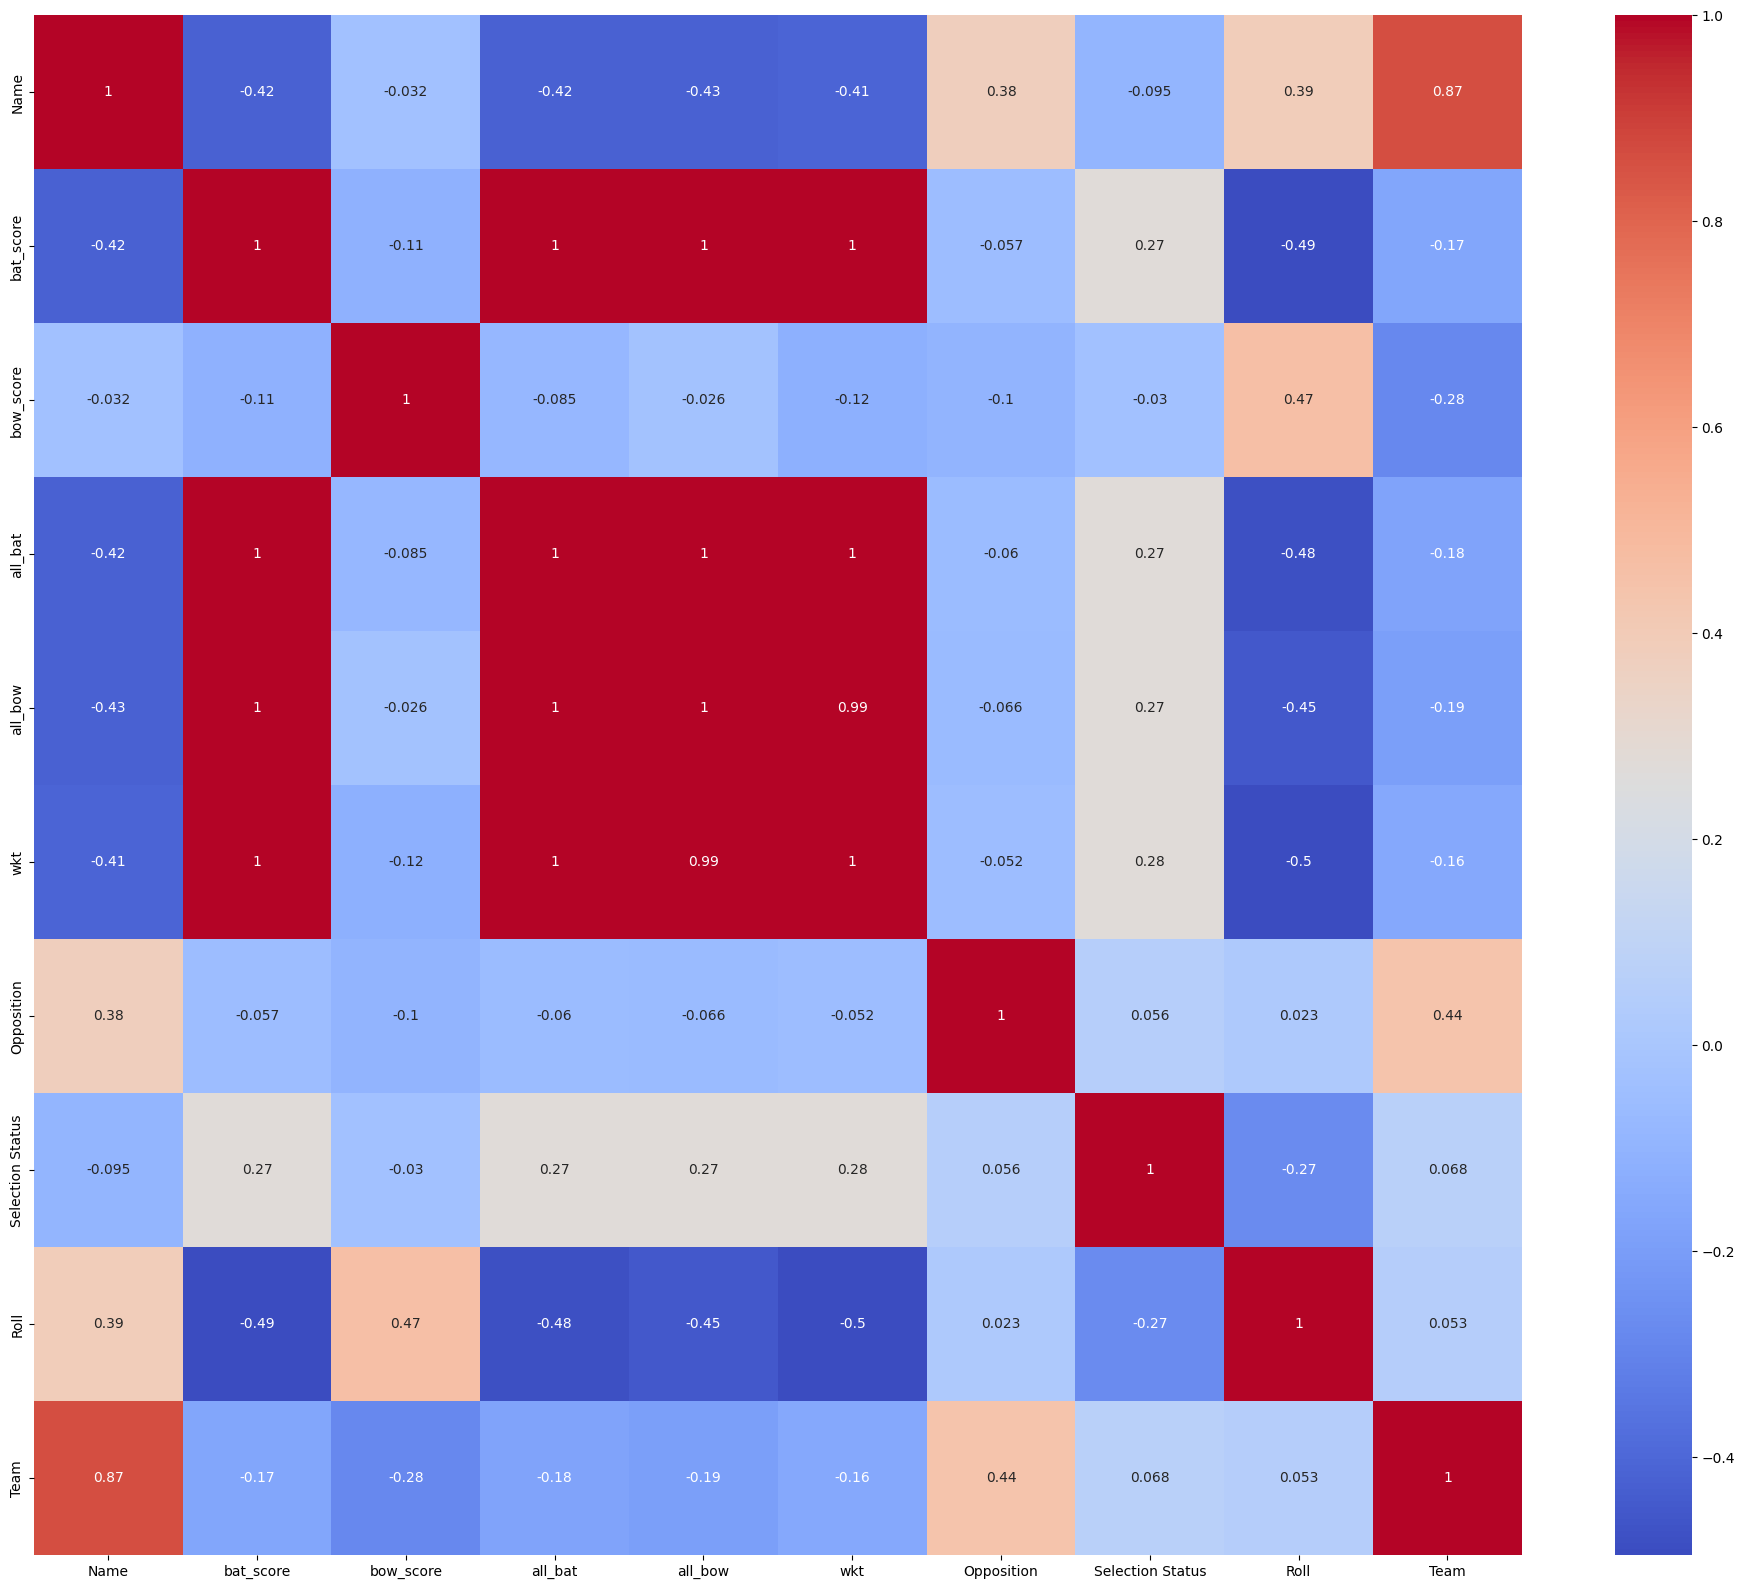

In [407]:
plt.figure(figsize=(24,20))
sns.heatmap(df4.corr(),annot=True,cmap='coolwarm')

In [408]:
new_df = df4.drop(['Selection Status'],axis=1)

In [409]:
new_df

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Team
0,0,1363.84,41.73,958.86,760.54,613.73,0,0,0
1,1,895.60,31.59,630.08,500.48,403.02,0,0,0
2,2,0.00,0.00,0.00,0.00,0.00,0,0,0
3,3,0.00,0.00,0.00,0.00,0.00,0,0,0
4,4,0.00,0.00,0.00,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
760,29,67.49,172.02,64.44,80.12,30.37,3,2,1
761,30,3.94,47.34,7.49,14.00,1.77,3,2,1
762,31,0.00,0.00,0.00,0.00,0.00,3,2,1
763,32,0.00,0.00,0.00,0.00,0.00,3,2,1


In [410]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(new_df, df4["Selection Status"], random_state=42, test_size=0.15)

In [411]:
standard_scaler = StandardScaler().fit(x_train)
x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

In [412]:
x_train_scaled.shape, x_test_scaled.shape

((650, 9), (115, 9))

In [413]:
import tensorflow as tf
from tensorflow import keras
tf.get_logger().setLevel('ERROR')
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_decay_cb = keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=1, factor=0.5, min_lr=1e-8)

In [414]:
nn_model = keras.models.Sequential([
keras.layers.InputLayer(x_train_scaled.shape[1],),
keras.layers.Dense(256, activation="relu"),
keras.layers.Dense(32, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])
nn_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(), \
                 metrics=["accuracy", 'AUC'])

In [415]:
history = nn_model.fit(x_train_scaled, np.asanyarray(y_train).astype(np.float32),
                       epochs=100, batch_size=20, validation_split=0.15, callbacks=[early_stopping_cb], verbose=0)

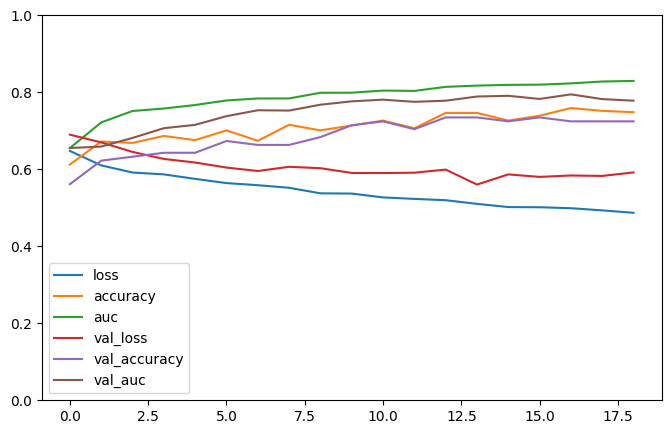

In [416]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

In [417]:
!pip install scikeras

In [418]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate

In [419]:
base_model = KerasClassifier(model=nn_model, batch_size=32, epochs=100, verbose=0)

In [420]:
score_type = ['accuracy', 'precision', 'recall', 'f1']

In [421]:
score = cross_validate(base_model, x_train_scaled, y_train, cv=10, scoring = score_type, return_train_score=True, verbose=0)

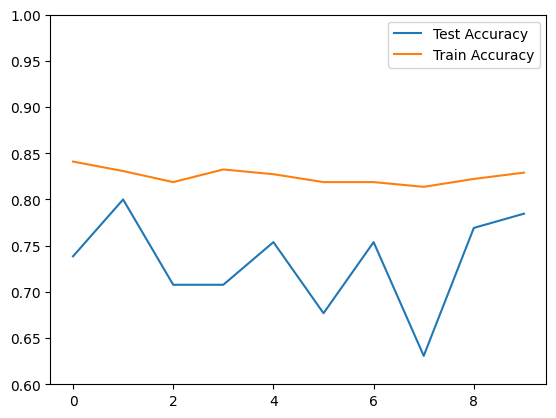

In [422]:
plt.plot(score['test_accuracy'])
plt.plot(score['train_accuracy'])

plt.legend(['Test Accuracy', 'Train Accuracy'], loc= "best")
plt.gca().set_ylim(0.6,1)
plt.show()

In [423]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(x_train_scaled.shape[1], ))

    for i in range(hp.Int('num_layers', 2, 6, default=3)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), 8, 128, step=16), activation='relu'))

    if hp.Boolean('dropout'):
        model.add(keras.layers.Dropout(rate=0.4))

    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])), \
                  metrics=["accuracy", 'AUC', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.F1Score()])

    return model

In [424]:
!pip install keras_tuner

In [425]:
import keras_tuner as kt

In [426]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=5,
    overwrite=True
)

In [427]:
tuner.search(x_train_scaled, np.asarray(y_train).astype(np.float32),
             validation_split=0.15, epochs=60, batch_size=32,
             callbacks=[early_stopping_cb, checkpoint_cb, lr_decay_cb])

Trial 20 Complete [00h 00m 47s]
val_accuracy: 0.7367347002029419

Best val_accuracy So Far: 0.759183669090271
Total elapsed time: 00h 25m 42s


In [428]:
best_nn_model = tuner.get_best_models()[0]

In [429]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2560      
                                                                 
 dense_13 (Dense)            (None, 32)                8224      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10817 (42.25 KB)
Trainable params: 10817 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [430]:
best_nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 88)                880       
                                                                 
 dense_1 (Dense)             (None, 104)               9256      
                                                                 
 dense_2 (Dense)             (None, 40)                4200      
                                                                 
 dense_3 (Dense)             (None, 24)                984       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 15345 (59.94 KB)
Trainable params: 15345 (59.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [431]:
nn_loss = best_nn_model.evaluate(x_test_scaled, np.asarray(y_test).astype(np.float32))

4/4 [==============================] - 1s 26ms/step - loss: 0.4938 - accuracy: 0.7565 - auc: 0.8456 - precision: 0.8214 - recall: 0.7188 - f1_score: 0.7151


In [464]:
df5 = pd.read_csv('Pre.csv')

In [465]:
df5.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Match Date,Team
0,Virat,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
1,Rohit,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
2,Ishan,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
3,Sheryas,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
4,Rahul,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0


In [466]:
ordinal_mapping = {'Batsman': 0, 'Allrounder': 1, 'Bowler': 2,'Bowling Allrounder':3}
df5['Roll'] = df5['Roll'].map(ordinal_mapping)
ordinal_mapping = {'Australia': 0, 'South Africa': 1, 'Sri Lanka': 2,'England':3,'New Zealand':4,'Bangladesh':5,'Pakistan':6,'Afghanistan':7\
                   ,'India':8,'Netherlands':9}
df5['Opposition'] = df5['Opposition'].map(ordinal_mapping)

In [467]:
for index, row in df5.iterrows():
    name = df5.at[index,'Name']
    date = df5.at[index,'Match Date']
    df5.at[index,'bat_score'] = round(count(df[df['Player']==name],date),2)
    df5.at[index,'bow_score'] = round(count2(df2[df2['Player']==name],date),2)
    df5.at[index,'all_bat'] = round(batall(name,date),2)
    df5.at[index,'all_bow'] = round(bowall(name,date),2)
    df5.at[index,'wkt'] = round(wek(df3[df3['Player']==name],name,date),2)

In [468]:
ordinal_mapping = {'Virat': 0, 'Rohit': 1, 'Ishan': 2,'Sheryas':3,'Rahul':4,'Shubman':5,'Hardik':6,'Jasprit':7,'Kuldeep':8,'Shami':9, \
                   'Axar':10,'Shardul':11,'Siraj':12,'Suryakumar':13,'Ashwin':14,'Jadeja':15,'Krishna':16,'Temba':17,'Quinton':18,\
                    'Rezza':19, 'Heinrich':20, 'Aiden':21, 'David':22, 'Rassie':23, 'Marco':24, 'Andile':25,'Gerald':26, 'Keshav':27\
                   , 'Lungi':28, 'Kagiso':29, 'Tabraiz':30, 'Lizzad':31,'Sisanda':32, 'Anrich':33}
df5['Name'] = df5['Name'].map(ordinal_mapping)

In [469]:
df5.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Match Date,Team
0,0,2394.96,44.80,1680.95,1328.43,1077.73,1,0,19 Nov 2023,0
1,1,1837.29,31.59,1289.26,1018.41,826.78,1,0,19 Nov 2023,0
2,2,207.14,0.00,145.00,113.93,97.39,1,0,19 Nov 2023,0
3,3,435.94,0.00,305.16,239.77,196.17,1,0,19 Nov 2023,0
4,4,500.23,0.00,350.16,275.13,240.56,1,0,19 Nov 2023,0


In [470]:
df5 = df5.drop(['Match Date'],axis=1)

In [471]:
df5.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Team
0,0,2394.96,44.80,1680.95,1328.43,1077.73,1,0,0
1,1,1837.29,31.59,1289.26,1018.41,826.78,1,0,0
2,2,207.14,0.00,145.00,113.93,97.39,1,0,0
3,3,435.94,0.00,305.16,239.77,196.17,1,0,0
4,4,500.23,0.00,350.16,275.13,240.56,1,0,0


In [472]:
standard_scaler = StandardScaler().fit(df5)
x_scaled = standard_scaler.transform(df5)

In [473]:
predictions = best_nn_model.predict(x_scaled)
for pair in zip(names, predictions):
    print(pair)

2/2 [==============================] - 0s 6ms/step
('Virat', array([0.7619606], dtype=float32))
('Rohit', array([0.6808629], dtype=float32))
('Ishan', array([0.6090789], dtype=float32))
('Sheryas', array([0.7649342], dtype=float32))
('Rahul', array([0.77177715], dtype=float32))
('Shubman', array([0.76482546], dtype=float32))
('Jasprit', array([0.6077687], dtype=float32))
('Kuldeep', array([0.5792832], dtype=float32))
('Shami', array([0.53411925], dtype=float32))
('Axar', array([0.1554096], dtype=float32))
('Shardul', array([0.5093929], dtype=float32))
('Siraj', array([0.53587866], dtype=float32))
('Suryakumar', array([0.6133822], dtype=float32))
('Ashwin', array([0.09703709], dtype=float32))
('Jadeja', array([0.4755145], dtype=float32))
('Krishna', array([0.29081538], dtype=float32))
('Temba', array([0.8663944], dtype=float32))
('Quinton', array([0.9960633], dtype=float32))
('Rezza', array([0.3332293], dtype=float32))
('Heinrich', array([0.87567014], dtype=float32))
('Aiden', array([0.